In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ClassifiedData')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [10]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_feature
y = df['TARGET CLASS']

In [22]:
X_tarin, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_tarin, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
predict = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       142
           1       0.94      0.92      0.93       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



<AxesSubplot:>

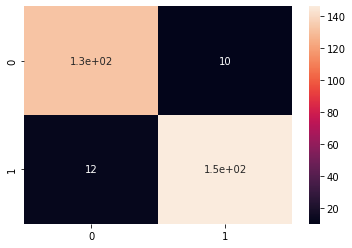

In [30]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True)

In [31]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tarin, y_train)

    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error Rate')

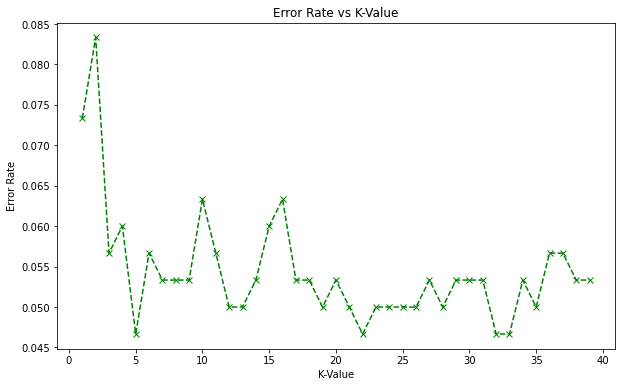

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='green', linestyle='dashed', marker='x')
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tarin, y_train)
predict = knn.predict(X_test)


In [40]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



<AxesSubplot:>

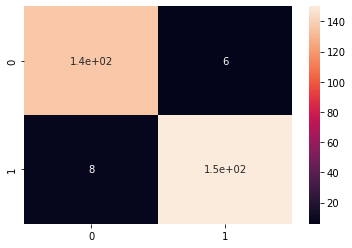

In [41]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True)